# TP 1 de $\textit{Physique numérique}$ par Gabriel Hémond et Meriem Khalfoun
# Pouvoir d’arrêt collisionnel des protons
## 1.
Typiquement, les protons utilisés en protonthérapie ont entre 70 et 250 MeV d'énergie cinétique, mais l'énergie maximale utilisée la plus commune dans les centres de photonthérapie est de 230 MeV.

L'énergie totale d'un corps s'écrit $E=\gamma mc^2$ alors que l'énergie de repos s'écrit $E_0=mc^2$, donc l'énergie cinétique est $T=E-E_0=(\gamma-1)mc^2$. En inversant cette équation, on obtient $$\boxed{\gamma=\frac{T}{mc^2}+1}$$ Par leur définition, $\beta=\frac{v}{c}$ et $\gamma=\frac{1}{\sqrt{1-\frac{v^2}{c^2}}}$. Par substitution, on voit que $$\boxed{\gamma=\frac{1}{\sqrt{1-\beta^2}}}\quad\text{et}\quad\boxed{\beta=\sqrt{1-\frac{1}{\gamma^2}}}$$

## 2.
La densité électronique ($n_e$) est le nombre d'électrons par unité de volume, ce qui correspond à la somme des densités atomiques des différents éléments du matériau multipliées par leur nombre de proton ($Z$) par atome correspondant (en présumant que le matériau est électriquement neutre). La densité atomique d'un élément correspond à la densité massique du matériau ($\rho$) en grammes par cm$^3$ multipliée par la fraction de la masse du matériau appartenant à l'élément ($\xi$) divisée par la masse atomique de l'élément ($m_Z$) en grammes par mole, le tout multiplié par le nombre d'Avogadro ($N_o$) pour que les grammes par moles deviennent des grammes par atome. Autrement dit, $$n_e=\rho N_A\sum_{Z=1}^\infty\frac{Z\xi_Z}{m_Z}$$

In [35]:
def densite_elec_massique(masses_materiau, masses_atomiques, rho, avogadro):
    """Évalue la densité électronique en électrons par cm^3"""
    densite = 0
    for i in masses_materiau:
        densite += i * masses_materiau[i] / masses_atomiques[i]
    
    densite = densite * avogadro * rho
    return densite


avogadro = 6.022 * 10 ** 23  # [atomes par mole]
masses_atomiques = {
    1: 1.0079,
    6: 12.0107,
    7: 14.0067,
    8: 15.9994,
    12: 24.305,
    15: 30.9738,
    16: 32.065,
    20: 40.078,
    30: 65.39,
}

masses_eau = {1: 0.111894, 8: 0.888106}
masses_os = {
    1: 0.047234,
    6: 0.144330,
    7: 0.041990,
    8: 0.446096,
    12: 0.002200,
    15: 0.104970,
    16: 0.003150,
    20: 0.209930,
    30: 0.000100
}
rho_os = 1.85  # Densités massiques [g/cm^3]
rho_eau = 1

densite_elec_eau =  densite_elec_massique(masses_eau, masses_atomiques, rho_eau, avogadro)
densite_elec_os = densite_elec_massique(masses_os, masses_atomiques, rho_os, avogadro)

print("Densité électronique de l'eau: {0} électrons par cm^3\n".format(densite_elec_eau))
print("Densité électronique de l'os cortical: {0} électrons par cm^3".format(densite_elec_os))

Densité électronique de l'eau: 3.342731617093692e+23 électrons par cm^3

Densité électronique de l'os cortical: 5.807706023151945e+23 électrons par cm^3


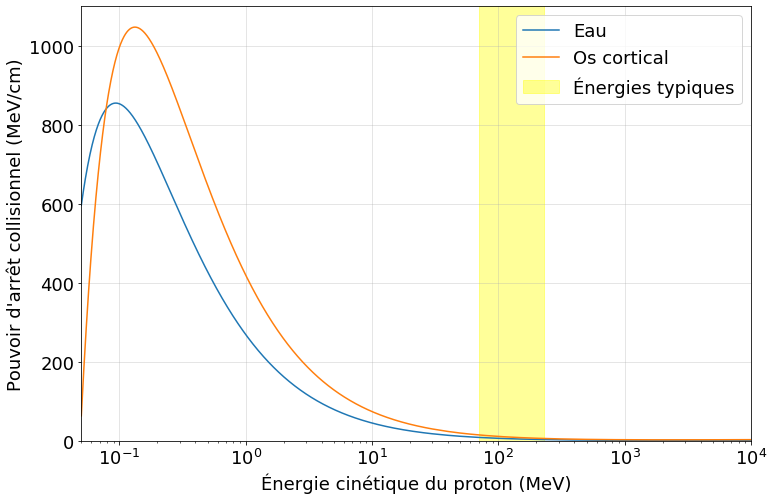

In [36]:
import matplotlib.pyplot as plt
import numpy as np


def pouvoir(energie, dens, re, me):
    '''Approximation du pouvoir d'arrêt en fonction de l'énergie cinétique'''
    Scol = lambda T : (2 * np.pi * re ** 2 * me * dens / (1 - 1 / (T / mp + 1) ** 2)) * (np.log(2 * me * (1 - 1 / \
                        (T / mp + 1) ** 2) * (T / mp + 1) ** 2 * ((2 * me * ((T / mp + 1) ** 2 - 1)) / (1 + 2 * (T / \
                            mp + 1) * me / mp + (me / mp) ** 2)) / energie ** 2) - 2 * (1 - 1 / (T / mp + 1) ** 2))
    return Scol


re = 2.82 * 10 ** -13  # Rayon classique de l'électron (cm)
me = 0.511  # Masse classique de l'électron multipliée par c^2 (MeV)
mp = 938  # Masse classique du proton multipliée par c^2 (MeV)
energie_eau = 75 * 10 ** -6  # Énergies d'excitation moyenne (MeV)
energie_os = 106.4 * 10 ** -6

Scol_eau = np.vectorize(pouvoir(energie_eau, densite_elec_eau, re, me))
Scol_os = np.vectorize(pouvoir(energie_os, densite_elec_os, re, me))

axis = np.linspace(0.05, 1, 2000)
axis = np.append(axis, np.linspace(1.01, 30, 2000))
axis = np.append(axis, np.linspace(30.01, 10 ** 4, 1000))
plt.figure(figsize=(12, 8))
plt.plot(axis, Scol_eau(axis), axis, Scol_os(axis))
plt.fill_between(np.linspace(70, 230), 0, 1400, color='yellow', alpha=0.4)
plt.legend(('Eau', 'Os cortical', 'Énergies typiques'), loc='upper right', fontsize=18)
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Pouvoir d'arrêt collisionnel (MeV/cm)", fontsize=18)
plt.xlim(0.05, 10 ** 4)
plt.ylim(0, 1100)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.grid('on', alpha=0.4)

# Portée des protons dans la matière
## 3.
La portée dans l'approximation CSDA ($R_{CSDA}$) est exprimée en grammes par centimètre carré. Or, on a que $\frac{R_{CSDA}}{\rho}=\int_0^{T_i}\frac{\text{d}T'}{S_{col}}$. $S_{col}$ est exprimé en MeV/cm et $\rho$ en g/cm$^3$, ce qui signifie que $\frac{\text{d}T'}{S_{col}}$ et $\frac{R_{CSDA}}{\rho}$ sont tous deux exprimés en centimètres. Ainsi, on peut dire que l'analyse dimensionnelle montre que l'équation est logique.

## 4.
Le graphique suivant superpose le pouvoir d'arrêt collisionnel calculé (en bleu) et le pouvoir d'arrêt total trouvé sur le site du NIST (en orange) entre 70 MeV et 250 MeV, c'est-à-dire dans la gamme d'énergie des protons typiquement utilisés en protonthérapie. 
On remarque que la courbe et les points se superposent parfaitement, ce qui justifie l'utilisation du pouvoir d'arrêt collisionnnel pour représenter le pouvoir d'arrêt total dans cette la gamme d'énergie communément.

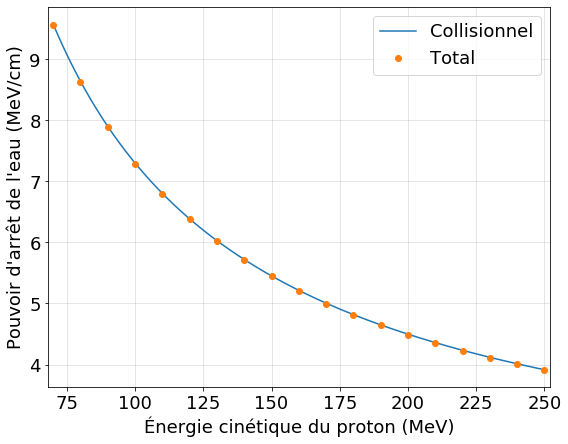

In [37]:
axis_ref = np.linspace(70, 250, 19)
ref = [9.559,8.625,7.888,7.289,6.794,6.377,6.021,5.713,5.445,5.209,4.999,4.812,4.644,4.492,4.354,4.229,4.114,4.008,3.911]
axis = np.linspace(70, 250, 4000)
plt.figure(figsize=(9, 7))
plt.plot(axis, Scol_eau(axis), axis_ref, ref, 'o')
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Pouvoir d'arrêt de l'eau (MeV/cm)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(("Collisionnel", "Total"), fontsize=18)
plt.xlim(68, 252)
plt.grid('on', alpha=0.4)

# Détermination de $R_{CSDA}$ par intégration numérique
## 5.

## 6.
L'intégrale valant $R_{CSDA}$ peut se calculer grâce à un algorithme adaptatif utilisant la méthode des trapèzes. 

L'intégration adaptative consiste à utiliser un petit nombre de trapèzes pour ensuite le doubler itérativement jusqu'à l'obtention de l'erreur désirée. L'erreur se calcule comme suit: $$\varepsilon_n = \frac{I_n- I_{n - 1}}{3}$$où $I_n=\frac{I_{n-1}}{2}+\frac{T_i}{2^n}\sum_{k=1}^{2^n-1}f\left(\frac{kT_i}{2^n}\right)$ est la valeur de l'intégrale selon le calcul effectué à la $i$ème itération.

Dans notre cas, on cherche à avoir une précision valant $10^{-9}$cm. Il est à noter que l'intégrale ne sera pas vraiment calculée entre $T_i$ et $0$ puisque l'approximation du pouvoir d'arrêt n'est pas bonne dans tout l'intervalle. Ainsi, lorsque les protons auront 0.07MeV, ils seront considérés comme stoppés.

In [45]:
import time

def trapezoid_algo(Scol, Tproton, cible, start):
    """Applique la méthode des trapèzes de façon adaptative et calcule l'erreur jusqu'à l'obtention de l'erreur désirée"""
    temps = time.time()
    step = Tproton - start
    erreur = cible + 1
    n = 0
    prev = step * (1 / Scol(Tproton) + 1 / Scol(start))
    
    while erreur > cible:
        values = np.linspace(start + step / 2 ** (n + 1), Tproton - step / 2 ** (n + 1), 2 ** n)
        somme = step * np.sum(1 / Scol(values))
        current = prev / 2 + somme / 2 ** n
        erreur = abs(current - prev) / 3
        prev = current
        n += 1
    
    temps = time.time() - temps
    results = [current, erreur, n - 1, temps]
    return results


cible = 10 ** -9  # Erreur cible [cm]
Tproton = 100  # Énergie cinétique du proton incident [MeV]
start = 0.07

RCSDA_eau = trapezoid_algo(Scol_eau, Tproton, cible, start)
RCSDA_os = trapezoid_algo(Scol_os, Tproton, cible, start)

print("La portée d'un proton à {0}MeV est ({1:13.12} ± {2:7.3})cm dans l'eau".format(Tproton, RCSDA_eau[0], RCSDA_eau[1]))
print("Ce calcul a nécessité {0:2} itérations et {1:17.15f} secondes\n".format(RCSDA_eau[2], RCSDA_eau[3]))
print("La portée d'un proton à {0}MeV est ({1:13.12} ± {2:7.3})cm dans l'os cortical".format(Tproton, RCSDA_os[0], RCSDA_os[1]))
print("Ce calcul a nécessité {0:2} itérations et {1:17.15f} secondes".format(RCSDA_os[2], RCSDA_os[3]))

La portée d'un proton à 100MeV est (15.4029799147 ± 7.98e-10)cm dans l'eau
Ce calcul a nécessité 16 itérations et 0.450024366378784 secondes

La portée d'un proton à 100MeV est ( 9.3129696378 ± 8.77e-10)cm dans l'os cortical
Ce calcul a nécessité 17 itérations et 0.938755989074707 secondes


## 7.
On sait que:
\begin{aligned}
\beta^2 &= 1 - \frac{1}{\gamma^2} = \frac{\gamma^2 - 1}{\gamma^2}\\
\gamma &= \frac{T}{m_pc^2} + 1 \\
\frac{\text{d}\gamma}{\text{d}T} &= \frac{1}{m_pc^2}
\end{aligned}

En posant les variables suivantes:
\begin{aligned}
&T_{e}^{\max }=\frac{a c^2 \left(\gamma^{2}-1\right)}{b+ 2\gamma d}\\
&\text { avec }: a=2 m_{e}, \quad b=1+\left(\frac{m_{e}}{m_{p}}\right)^{2} \quad \text { et } \quad d=\frac{m_{e}}{m_{p}}\\
&U=2 \pi r_{e}^{2} m_{e} c^{2} n_{e}\\
&k=\frac{a^{2}}{I^{2}}
\end{aligned}

On peut réécrire le pouvoir d’arrêt collisionnel en fonction de $\gamma$:
\begin{aligned}
S_{col}(\gamma) &= U\frac{\gamma^2}{\gamma^2 - 1} \left( \ln \left( \frac{k c^4 (\gamma^2 - 1)^2}{b + 2d\gamma} \right) -2\frac{(\gamma^2 - 1)}{\gamma^2} \right)
\end{aligned}

Grâce au théorème de dérivations des fonctions composées, on sait que $\frac{\text{d}S_{col}}{\text{d}T} = \frac{\text{d}S_{col}}{\text{d}\gamma} \frac{\text{d}\gamma}{\text{d}T}$

La dérivée en fonction de T du pouvoir d'arrêt collisionnel est donc:
$$\frac{\text{d}S_{col}}{\text{d}T} = \frac{1}{m_pc^2}\left(-\frac{2U\gamma}{(\gamma^2 - 1)^2} \ln \left(\frac{kc^4 (\gamma^2 - 1)^2}{b + 2d\gamma}\right) + \frac{2U\gamma^2(2b\gamma+3\gamma^2d+d)}{(\gamma^2 - 1)^2(b+2\gamma d)}\right)$$
De plus, la dérivée de l'inverse du pouvoir d'arrêt peut être trouvée grâce à la dérivation en chaîne:
$$\frac{\text{d}}{\text{d}T}\left(\frac{1}{S_{col}}\right)=-\frac{1}{(S_{col})^2}\frac{\text{d}S_{col}}{\text{d}T}$$

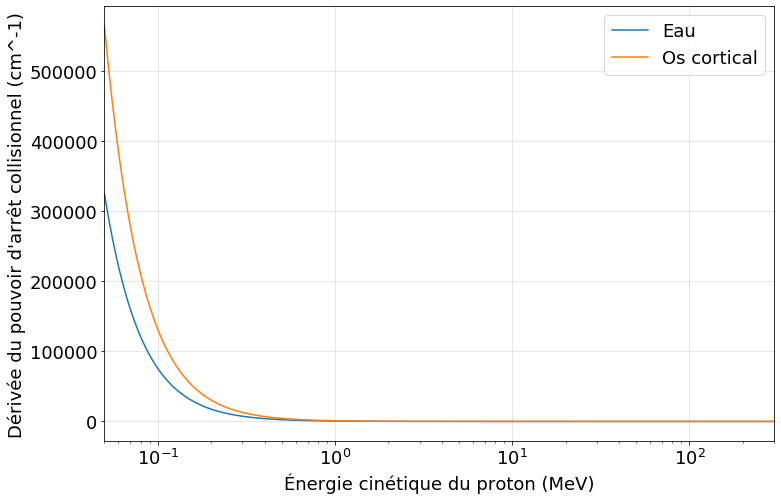

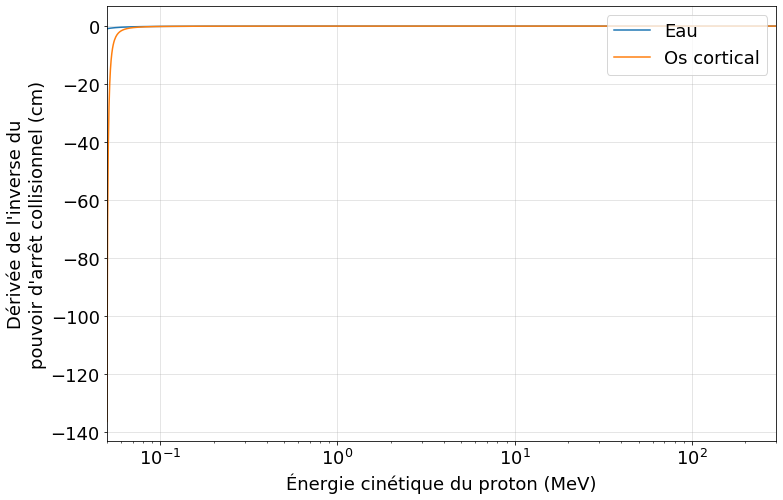

In [48]:
def Sprime(U, I, mp, me, b, d):
    Scolp = lambda T : 2 * U * (((T / mp + 1) ** 2 * (2 * b * (T / mp + 1) + 3 * d * (T / mp + 1) ** 2 + d) / \
                        (b + 2 * d * (T / mp + 1))) - ((T / mp + 1) * np.log(2 * me * (((T / mp + 1) ** 2 - 1) ** 2) / \
                            (b + 2 * d * (T / mp + 1))))) / (((T / mp + 1) ** 2 - 1) ** 2 * mp)
    return Scolp


U_eau = 2 * np.pi * re ** 2 * me * densite_elec_eau
U_os = 2 * np.pi * re ** 2 * me * densite_elec_os
d = me / mp
b = 1 + d ** 2

Sprime_eau = np.vectorize(Sprime(U_eau, energie_eau, mp, me, b, d))
Sprime_os = np.vectorize(Sprime(U_os, energie_os, mp, me, b, d))
Sprime_inv_eau = lambda T : -1 * Sprime_eau(T) / (Scol_eau(T)) ** 2
Sprime_inv_os = lambda T : -1 * Sprime_os(T) / (Scol_os(T)) ** 2

axis = np.linspace(0.05, 1, 2000)
axis = np.append(axis, np.linspace(1.01, 30, 2000))
axis = np.append(axis, np.linspace(30.01, 10 ** 4, 1000))
plt.figure(figsize=(12, 8))
plt.plot(axis, Sprime_eau(axis) , axis, Sprime_os(axis))
plt.legend(('Eau', 'Os cortical'), loc='upper right', fontsize=18)
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Dérivée du pouvoir d'arrêt collisionnel (cm^-1)", fontsize=18)
plt.xlim(0.05, 300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.grid('on', alpha=0.4)
plt.figure(figsize=(12, 8))
plt.plot(axis, Sprime_inv_eau(axis) , axis, Sprime_inv_os(axis))
plt.legend(('Eau', 'Os cortical'), loc='upper right', fontsize=18)
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Dérivée de l'inverse du\npouvoir d'arrêt collisionnel (cm)", fontsize=18)
plt.xlim(0.05, 300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.grid('on', alpha=0.4)

## 8.

# Optimisation
## 9.



In [ ]:
from scipy.special.orthogonal import p_roots

def gauss_algo(Scol, Tproton, cible, start):
    

## 10.
Avec l'approximation grossière $N\sim C^{-\frac{1}{2}}$ où $N$ est le nombre de points à considérer et $C$ est l'erreur désirée, on obtient que le nombre de points à utiliser est environ 31623. Afin de s'assurer que l'erreur sera toujours plus basse que $10^{-9}$cm, nous utiliserons plutôt 35000 points + les 2 points qui représentent les extrémités.

Durée: 23.846489191055298 secondes. Fréquence: 4.193489414681198 protons par seconde


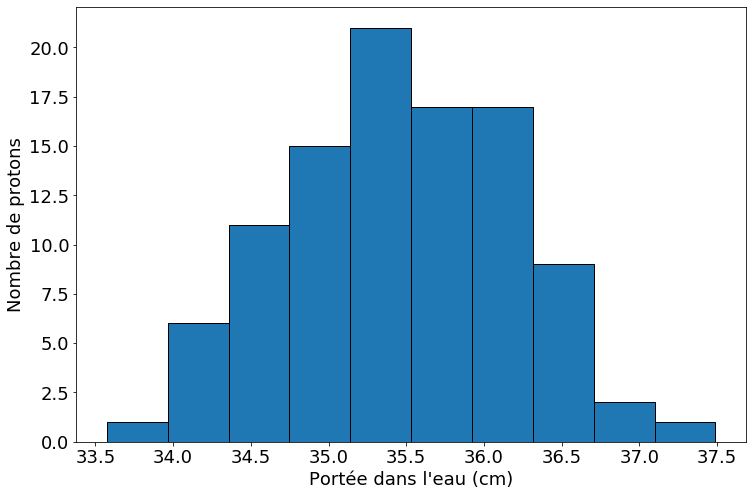

In [12]:
def trapezoid_pasdaptatif(Scol, énergies, start, N):
    temps = time.time()
    step = (énergies - start) / N
    values = np.linspace(step + start, énergies - step, N)
    estimates = step * np.sum(1 / Scol(values), axis = 0) + (1 / Scol(start) + 1 / Scol(énergies)) / 2
    temps = time.time() - temps
    print("Durée: {0} secondes. Fréquence: {1} protons par seconde".format(temps, len(énergies) / temps))
    return estimates

n_protons = 100
énergies_tests = np.random.normal(240, 3, (n_protons, 1))
number_of_points = 35000
portées_eau_trap = trapezoid_pasdaptatif(Scol_eau, énergies_tests, start, number_of_points)

plt.figure(figsize=(12, 8))
plt.hist(portées_eau_trap, bins=10, edgecolor='k')
plt.xlabel("Portée dans l'eau (cm)", fontsize=18)
plt.ylabel("Nombre de protons", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

## 11.


1.284766435623169


ValueError: x must have 2 or fewer dimensions

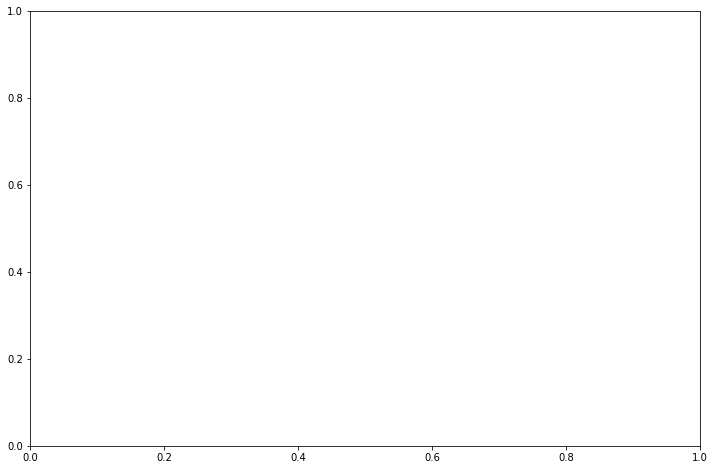

In [21]:
from scipy.integrate import quad

n_protons = 100
énergies_tests = np.random.normal(240, 3, (n_protons, 1))
calc_portées_eau_scipy = lambda T : quad(Scol_eau, start, T, epsabs = cible)
calc_portées_eau_scipy = np.vectorize(calc_portées_eau_scipy)
temps = time.time()
portées_eau_scipy = calc_portées_eau_scipy(énergies_tests)
temps = time.time() - temps

print(temps)

plt.figure(figsize=(12, 8))
plt.hist(portées_eau_scipy, bins=10, edgecolor='k')
plt.xlabel("Portée dans l'eau (cm)", fontsize=18)
plt.ylabel("Nombre de protons", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

## 12.

## 13.

## 14.
